# A Supervised Machine Learning Model for House Price prediction

# EDA

In [1]:

import pandas as pd
from google.colab import files

uploaded = files.upload()



Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


Link to data set : https://www.kaggle.com/datasets/rishabhr717/bengaluru-house-datacsv

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
print(df['area_type'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [7]:
print(df['availability'].nunique())

81


In [8]:
print(df['availability'].unique())

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


In [9]:
# Rename 'Immediate Possession' to 'Not Ready to Move' in the 'availability' column
df['availability'] = df['availability'].replace({'Immediate Possession': 'Ready to Move'})

print(df['availability'].unique())

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Ready to Move' '19-May' '17-Nov' '20-Oct'
 '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct'
 '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug'
 '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul'
 '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov'
 '20-Apr' '16-Jan' '14-Jul']


In [10]:
values_to_replace = []

for value in df['availability'].unique():
    if value != 'Ready To Move':
        values_to_replace.append(value)

df['availability'] = df['availability'].replace(values_to_replace, 'Not Ready to Move')

print(df['availability'].unique())

['Not Ready to Move' 'Ready To Move']


In [11]:
print(df['availability'])

0        Not Ready to Move
1            Ready To Move
2            Ready To Move
3            Ready To Move
4            Ready To Move
               ...        
13315        Ready To Move
13316        Ready To Move
13317        Ready To Move
13318    Not Ready to Move
13319        Ready To Move
Name: availability, Length: 13320, dtype: object


In [12]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [13]:
print(df['location'].unique())

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [14]:
print(len(df['location'].unique()))

1306


In [15]:
a=df['location'].unique()
print(len(a))

1306


In [16]:
print(df['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [17]:
print(df['size'].nunique())

31


In [18]:
print(len(df['size'].unique()))

32


In [19]:
# in column 'size' there are many string values, replace each value with the 0th index of each value

# Replace string values in 'size' column with their 0th index
df['size'] = df['size'].astype(str).str[0]

print(df['size'].unique())
df

['2' '4' '3' '6' '1' '8' '7' '5' '9' 'n']


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00


# Handling Null Values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**society column has many null values so we can remove it.**

In [21]:
# drop column society

df.drop('society', axis=1, inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [22]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
df['total_sqft'].nunique()

2117

In [24]:
df[df.total_sqft<=3000]

TypeError: '<=' not supported between instances of 'str' and 'int'

In [25]:
print(pd.to_numeric(df['total_sqft']))

ValueError: Unable to parse string "2100 - 2850" at position 30

In [26]:
range_count = df['total_sqft'].str.contains('-').sum()

print(range_count)

201


In [27]:
for index, value in df['total_sqft'].items():
    if '-' in value:
        df.drop(index, inplace=True)

In [28]:
print(pd.to_numeric(df['total_sqft']))

ValueError: Unable to parse string "34.46Sq. Meter" at position 402

In [29]:
for index, value in df['total_sqft'].items():
    if '.' in value:
        df.drop(index, inplace=True)

In [30]:
print(pd.to_numeric(df['total_sqft']))

ValueError: Unable to parse string "4125Perch" at position 632

In [31]:
# Converting 'total_sqft' column to numeric
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Drop rows with NaN values in 'total_sqft'
df.dropna(subset=['total_sqft'], inplace=True)

# Now you can safely print the numeric values
print(df['total_sqft'])

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12986, dtype: float64


In [32]:
print(df['bath'].unique())

[ 2.  5.  3.  4.  6.  1.  9.  8.  7. nan 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]


In [33]:
print(df['bath'].nunique())

19


In [34]:
print(pd.to_numeric(df['bath']).astype('Int64'))

0        2
1        5
2        2
3        3
4        2
        ..
13315    4
13316    5
13317    2
13318    4
13319    1
Name: bath, Length: 12986, dtype: Int64


In [35]:
nullvalues=df['balcony'].isnull().sum()
nullvalues

547

In [36]:
df = df.dropna(subset=['balcony'])
df = df.dropna(subset=['bath'])
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,4689.0,4.0,1.0,488.00


replacing inappropiate fraction values in bath (having a 1.5 bathrooms is technically not possible )

In [37]:
df['bath'] = df['bath'].astype(int)

In [38]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,1056.0,2,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,4689.0,4,1.0,488.00


# Clasifying the locations into Posh, Rural, Urban, Suburban

In [39]:
df["price_per_sqft"] = (df["price"] * 100000) / df["total_sqft"]
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,1056.0,2,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3,3.0,112.00,6530.612245
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4,0.0,231.00,6689.834926
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00,5258.545136
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,4689.0,4,1.0,488.00,10407.336319


In [40]:
location_stats = df.groupby("location")["price_per_sqft"].mean().reset_index()
location_stats

,location,price_per_sqft
0,Anekal,4558.404558
1,Banaswadi,6641.366224
2,Basavangudi,7462.686567
3,Bhoganhalli,7733.108108
4,Devarabeesana Halli,7900.452568
...,...,...
1252,singapura paradise,11666.666667
1253,t.c palya,11851.851852
1254,tc.palya,5651.101350
1255,vinayakanagar,16666.666667


In [41]:
def classify_location(price):
    if price > 10000:
        return "Posh"
    elif price > 5000:
        return "Urban"
    elif price > 3000:
        return "Suburban"
    else:
        return "Rural"

df["area_category"] = df["price_per_sqft"].apply(classify_location)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,area_category
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,1056.0,2,1.0,39.07,3699.810606,Suburban
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5,3.0,120.00,4615.384615,Suburban
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3.0,62.00,4305.555556,Suburban
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1.0,95.00,6245.890861,Urban
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1.0,51.00,4250.000000,Suburban
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3,3.0,112.00,6530.612245,Urban
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4,0.0,231.00,6689.834926,Urban
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00,5258.545136,Urban
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,4689.0,4,1.0,488.00,10407.336319,Posh


In [42]:
print(df.isnull().sum())

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
area_category     0
dtype: int64


**If I replace the one missing value in location with mean or mode it might even cause outliers, so assigning a location based on its price.**

In [43]:

# Finding the row with missing location value
missing_location = df[df['location'].isnull()]

# Print the price_per_sqft for those rows
print(missing_location['price_per_sqft'])


568    5375.0
Name: price_per_sqft, dtype: float64


In [44]:
# Finding locations where price_per_sqft is between 5375 to 5370
locations = df[df['price_per_sqft'].between(5373, 5375)]['location'].unique()
locations


array([nan, 'Doddanakundi Industrial Area 2', 'Hegde Nagar'], dtype=object)

In [45]:
#assigning its area_category as urban
df.loc[df['location'].isnull(), 'area_category'] = 'Urban'


In [46]:
df.loc[df['location'].isnull(), 'location'] = 'Hegde Nagar'

In [47]:
print(df.isnull().sum())

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
area_category     0
dtype: int64


In [48]:
import plotly.express as px
px.scatter(df, x="area_category", y="price")


# Outlier deduction and Treatment

In [49]:

# analyzing 'price' column in df dataframe
# Calculating IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create the box plot using plotly
fig = px.box(df, y="price", title="Box Plot of Price")
fig.show()


Outliers: The points outside the whiskers (the lines extending from the box). There are quite a few data points above the upper whisker, indicating the presence of outliers on the higher end of the price range.

Skewness: The box plot appears to be right-skewed, meaning the distribution is not symmetrical and has a longer tail on the right side due to these high-priced outliers.

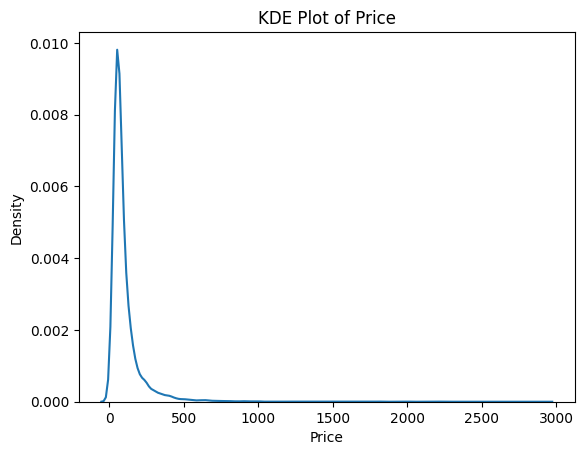

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE Plot of Price')
plt.show()

When a distribution is right-skewed (aka positively skewed) it means:

*  The distribution has a longer tail on the right side.
*   The mean (average) is typically greater than the median (middle value). There are often outliers on the higher end of the data range.

This means the House prices are right-skewed. Where most houses fall within a certain price range, but there are a few extremely expensive luxury properties that pull the average price upwards.

example: data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100] #100 is an outlier

**the graph is right skewed (tail on the right side). A right-tailed graph has a longer or fatter tail on the right side so it is +ve skewness. skewness is how non-symmetrical a distribution is**


In [51]:
# Winsorization
upper_limit = df['price'].quantile(0.95)  # Cap at the 95th percentile
df['price_winsorized'] = df['price'].clip(upper=upper_limit)

capping the extreme values at a certain percentile. For example, you could cap the upper limit at the 95th percentile, effectively limiting the influence of outliers without removing them completely.

**Benefits of Winsorization:**


*   Reduces the impact of outliers on statistical analysis.
*   Preserves more data than removing outliers completely.
*   improve the stability of statistical model.



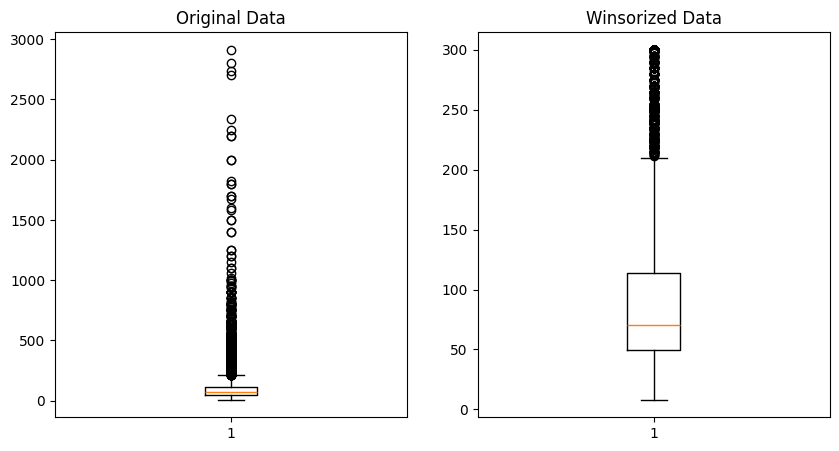

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) #positioning the graph (row, column, grid (top-left position))
plt.boxplot(df['price'])
plt.title('Original Data')

plt.subplot(1, 2, 2) #positioning next graph (row, column, grid (top-right position))
plt.boxplot(df['price_winsorized'])
plt.title('Winsorized Data')

plt.show()

the Winsorized box looks more compact and has fewer outliers, it means Winsorization has worked well.

Descriptive Statistics: Calculating descriptive statistics like the mean, median, and standard deviation before and after Winsorization.

"decrease in the mean and standard deviation"

In [53]:
print("Original Data:")
print(df['price'].describe())

print("\nWinsorized Data:")
print(df['price_winsorized'].describe())

Original Data:
count    12439.000000
mean       105.877804
std        132.266487
min          8.000000
25%         49.345000
50%         70.000000
75%        114.000000
max       2912.000000
Name: price, dtype: float64

Winsorized Data:
count    12439.00000
mean        94.94855
std         69.94453
min          8.00000
25%         49.34500
50%         70.00000
75%        114.00000
max        300.00000
Name: price_winsorized, dtype: float64


In [54]:
from scipy.stats import skew, kurtosis

print("Original Data:")
print("Skewness:", skew(df['price']))
print("Kurtosis:", kurtosis(df['price']))

print("\nWinsorized Data:")
print("Skewness:", skew(df['price_winsorized']))
print("Kurtosis:", kurtosis(df['price_winsorized']))

Original Data:
Skewness: 7.9297336320730825
Kurtosis: 107.9896809729882

Winsorized Data:
Skewness: 1.6735494622321843
Kurtosis: 2.0952561806502974


Winsorization reduced the skewness and kurtosis, making the distribution more symmetrical.

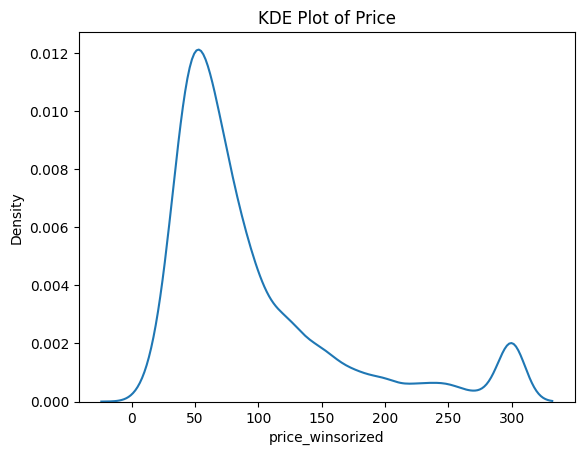

In [55]:
sns.kdeplot(df['price_winsorized'])
plt.xlabel('price_winsorized')
plt.ylabel('Density')
plt.title('KDE Plot of Price')
plt.show()

# Encoding

**There are 2 types of data categorical and numerical data. In numeric data there's discrete and contineous data. In categorical there are 2 types, ordinal and nominal. Nominal data is data that can be categorized, while ordinal data is data that can be ranked. nominal data example, male and female and ordinal data example poor, good, excellent.**

In [56]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,area_category,price_winsorized
0,Super built-up Area,Not Ready to Move,Electronic City Phase II,2,1056.0,2,1.0,39.07,3699.810606,Suburban,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5,3.0,120.00,4615.384615,Suburban,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3.0,62.00,4305.555556,Suburban,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1.0,95.00,6245.890861,Urban,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1.0,51.00,4250.000000,Suburban,51.00
...,...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3,3.0,112.00,6530.612245,Urban,112.00
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4,0.0,231.00,6689.834926,Urban,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00,5258.545136,Urban,60.00
13318,Super built-up Area,Not Ready to Move,Padmanabhanagar,4,4689.0,4,1.0,488.00,10407.336319,Posh,300.00


before checking for the correlation (using heatmaps) of fields with price(target variable) the categorical fields must be encoded. Since Machine learning algorithms typically work with numerical data. By encoding categorical variables, helps the model to understand these features. Since the numerical columns are already in number format, they don't need encoding.

encoding technique depends on:


*   The number of unique categories (cardinality)
*   Whether the categories have an intrinsic order(Ordinal data),
For example, Eye color (Blue, Brown, Green): No intrinsic order exists between the eye colors. Example of Ordinal data:
Shirt size (Small, Medium, Large): small < medium < large.
*   The type of ML model (linear models are more sensitive to multicollinearity compared to tree-based models)

**label encoding:**

for ordinal features (e.g., Low, Medium, High)

for - (area_category, area_type can also be encoded by label encoding)

**one-hot encoding:**

for non-ordinal features

| Super built-up Area | 1 | 0 |    | Plot Area | 0 | 1 |

(001, 010, 100 for just 3 values say red, blue and green respectively)

**location:**

Target encoding can be used since it has many unique values so if we use one-hot encoding it might create too many columns.


In [57]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for all categorical columns
for column in ['area_type','availability','area_category']:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

print(df.head())

   area_type  availability                  location size  total_sqft  bath  \
0          3             0  Electronic City Phase II    2      1056.0     2   
1          2             1          Chikka Tirupathi    4      2600.0     5   
2          0             1               Uttarahalli    3      1440.0     2   
3          3             1        Lingadheeranahalli    3      1521.0     3   
4          3             1                  Kothanur    2      1200.0     2   

   balcony   price  price_per_sqft  area_category  price_winsorized  
0      1.0   39.07     3699.810606              2             39.07  
1      3.0  120.00     4615.384615              2            120.00  
2      3.0   62.00     4305.555556              2             62.00  
3      1.0   95.00     6245.890861              3             95.00  
4      1.0   51.00     4250.000000              2             51.00  


In [58]:
#encoding location
# Calculating mean price for each location
location_means = df.groupby('location')['price'].mean().to_dict()

# Replace location values with their corresponding mean prices
df['location_encoded'] = df['location'].map(location_means)

# Drop the original 'location' column
df.drop('location', axis=1, inplace=True)
df

,area_type,availability,size,total_sqft,bath,balcony,price,price_per_sqft,area_category,price_winsorized,location_encoded
0,3,0,2,1056.0,2,1.0,39.07,3699.810606,2,39.07,45.411172
1,2,1,4,2600.0,5,3.0,120.00,4615.384615,2,120.00,118.662143
2,0,1,3,1440.0,2,3.0,62.00,4305.555556,2,62.00,60.997705
3,3,1,3,1521.0,3,1.0,95.00,6245.890861,3,95.00,115.348261
4,3,1,2,1200.0,2,1.0,51.00,4250.000000,2,51.00,91.213559
...,...,...,...,...,...,...,...,...,...,...,...
13314,3,1,3,1715.0,3,3.0,112.00,6530.612245,3,112.00,114.251429
13315,0,1,5,3453.0,4,0.0,231.00,6689.834926,3,231.00,123.904759
13317,0,1,2,1141.0,2,1.0,60.00,5258.545136,3,60.00,61.286310
13318,3,0,4,4689.0,4,1.0,488.00,10407.336319,0,300.00,142.506667


# Checking correlation & multicollinearity checks (heatmap)

**To find the relationship between our target variable( price and other variables)**

Coorelation is how 2 variable are related

Correlation ranges from -1 to +1, where:


+1 indicates a perfect positive correlation: When one variable increases, the other variable also increases proportionally. They move in the same direction.


-1 indicates a perfect negative correlation: When one variable increases, the other variable decreases proportionally. They move in opposite directions.


0 indicates no linear correlation: There is no relationship between the changes in the two variables.


before creating an ML model the unwanted fields has to be removed based on:
*   Relevance:
Do all columns contribute to predicting the target (price)? For example, price_per_sqft is already a derived measure from price and total_sqft, droping one of them to avoid redundancy.
*   If two or more features are highly correlated, it can cause Multicollinearity.
   *   Checking the correlation matrix
   *   Compute the Variance Inflation Factor (VIF) for each feature.
*  Fewer, more relevant features often lead to a simpler and more robust model.


In [59]:
# correlation between price and other variables (heatmap)

correlation_matrix = df.corr()

# Create the heatmap using plotly
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu')
fig.update_layout(title='Correlation Heatmap')
fig.show()


total_sqft and bath: There's likely a strong positive correlation between total square footage and the number of bathrooms, which is expected as larger properties tend to have more bathrooms.

total_sqft and size: There might be a correlation between total square footage and the size category (e.g., 2 BHK, 3 BHK), as larger properties often have more bedrooms and bathrooms.

bath and size: Similar to the previous point, there's likely a correlation between the number of bathrooms and the size category.

dropping price_per_sqft, as it is a derived measure from price and total_sqft, leading to redundancy or data leakage.

**Keeping: total_sqft, size, location_encoded, area_category, availability, balcony**

**Dropping: bath, price_per_sqft**

In [60]:
df_backup = df.copy()
df = df.drop(['bath', 'price_per_sqft'], axis=1)

#Train/Test Split

In [61]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [62]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9951, 8)
X_test shape: (2488, 8)
y_train shape: (9951,)
y_test shape: (2488,)


# Model Training, Tesing & Evaluation

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4413.675210241946
R-squared: 0.7301968677567672


# Confusion matrix


Since linear regression is a regression model and not a classification model, a confusion matrix is not directly applicable.  A confusion matrix is used to evaluate the performance of classification models.

however, creating a discretised version of the predictions and then generating a confusion matrix would be meaningful by seeing how regression predictions fall into certain price ranges.

Confusion Matrix (Categorized Predictions):
 [[703  86   2]
 [276 481  94]
 [  1  62 783]]


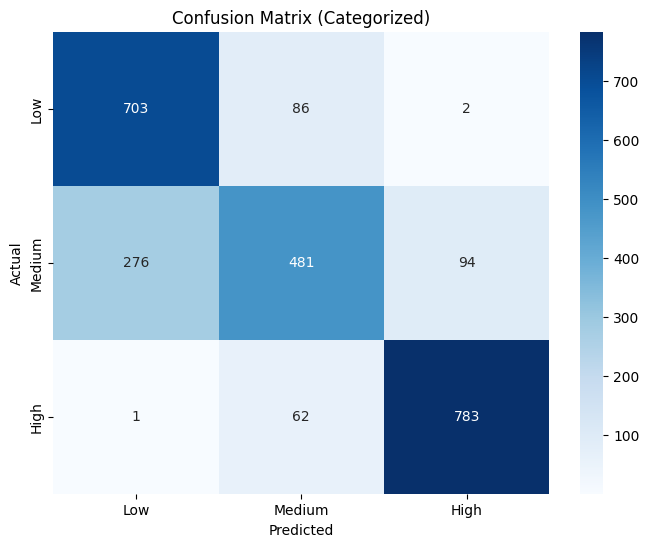

In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np

# categorize predictions into 'low', 'medium', 'high' price ranges
thresholds = np.quantile(y_test, [0.33, 0.66])  # Determine the thresholds
y_pred_cat = np.digitize(y_pred, bins=thresholds)
y_test_cat = np.digitize(y_test, bins=thresholds)


cm = confusion_matrix(y_test_cat, y_pred_cat)
print("Confusion Matrix (Categorized Predictions):\n", cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Categorized)')
plt.show()


# Conclusion

the R-squared value indicates the goodness of fit, a confusion matrix, adapted for regression by categorizing predictions, provides a visual representation of the model's performance across different price ranges. Further model evaluation and hyperparameter tuning could potentially lead to better results.